In [17]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

#propriedades do problema
N = 50
minimum_global = -6.5511
F = 0.8
C = 0.7
C1 = 1
C2 = 1
W = 0.7
vmax = 1


---
<h3> Rastrigin Function </h3>

In [18]:
def peaks(x): # objective function
    x = x.T
    F = 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    return F

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_16008/3990571093.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


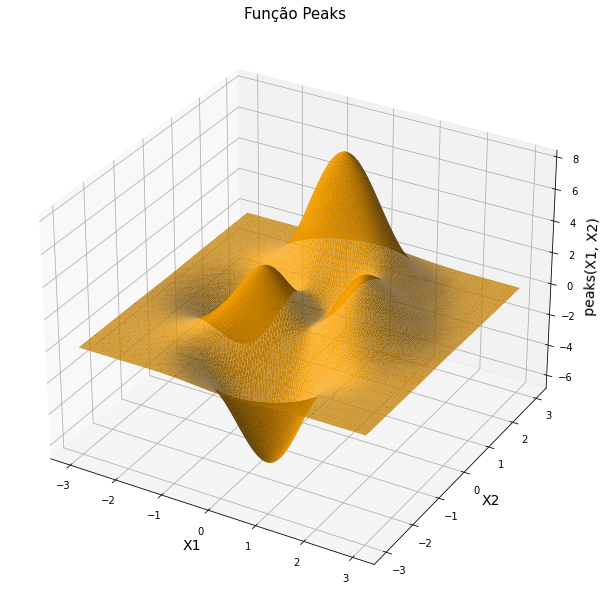

In [5]:
x1 = x2 = np.linspace(-3, 3, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Peaks', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
# IMPLEMENTAÇÃO


In [6]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop(pop, velocidades):

    for c in range(0,N):                                                        # laço para gerar os N indivíduos e suas velocidades
        individuo = []                                                              # lista auxiliar para gerar 1 elemento indivíduo
        velocidade = []                                                             # lista auxiliar para gerar 1 elemento velocidade
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))                  # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))                  # gera a coordenada x2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        pop.append(individuo[:])                                                    # adiciona o individuo na população
        velocidades.append(velocidade[:])
        

In [7]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = []
velocidades_teste = []
initPop(pop_teste, velocidades_teste)
print(f'população teste: {pop_teste}\n')
print(f'vetor velocidade: {velocidades_teste}')

população teste: [[0.619, -1.4155], [1.8794, -1.0711], [-1.2471, -1.3813], [0.9212, 1.4638], [2.3009, 0.4663], [-1.5659, 1.912], [0.0276, -1.2678], [-1.6649, 0.9871], [1.5229, 2.4081], [0.7051, 0.7666], [1.5077, -0.1828], [2.24, 2.3378], [0.1788, -0.503], [-1.0626, 2.2452], [-1.527, 0.1738], [0.4193, -1.2845], [1.5593, 1.5739], [0.6656, -2.313], [-2.4988, -2.3766], [1.4867, -2.4915], [0.7711, -2.183], [0.3605, 2.4421], [1.0521, -2.4088], [1.5313, -0.6108], [-1.7577, -0.4512], [1.3277, -1.1855], [1.5376, 2.3112], [0.7131, 0.7892], [1.0277, -1.086], [0.6709, -2.1985], [0.293, 0.7579], [2.4091, 2.2258], [2.696, 2.1523], [2.5012, -0.1986], [-1.117, 0.8668], [2.7991, 0.7273], [-0.5127, 1.4841], [1.0293, 1.5509], [-1.6433, -1.4567], [-1.8439, 1.6715], [-1.4858, -1.4902], [2.7585, -0.3718], [0.5669, -1.4426], [-0.6218, 1.0309], [-1.4555, -2.4828], [2.519, 0.8501], [-1.3741, 2.5646], [-2.1234, -0.6661], [-0.233, -1.6737], [0.1648, 0.0225]]

vetor velocidade: [[-0.04, -0.37], [-0.65, -0.8], [-0

In [8]:
#BLOCO 4: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):                
    ar = np.array(individuo)                                    #converte a lista individuo para array
    return float("{:.4f}".format(peaks(ar)))                    #calcula o f(x) do individuo apartir da função rastringin

In [9]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

-4.8729


In [10]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                                                #cria uma lista para armazenar o fitness da população   
    for c in range(0,N):                                                            #laço para analisar os N individuos
        fitness_ind = calcula_f_de_x(pop[c])                                               #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                                                    #coloca o fitness na lista
    return pop_fitness

In [11]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[-4.8729, 0.518, 0.6142, 3.6743, 0.4774, 0.4843, -3.9554, -0.8447, 0.251, 1.5998, 3.1533, 0.0226, 0.998, 1.1704, -2.8433, -4.8755, 0.97, -1.9752, 0.0044, -0.197, -2.2947, 1.9595, -0.7999, 2.1813, -1.2778, -0.0592, 0.3119, 1.6939, -0.6753, -2.5487, 1.1467, 0.0145, 0.0044, 0.2862, -0.9592, 0.0505, 6.0725, 3.0829, 0.2581, 0.1366, 0.3414, 0.0913, -5.2598, 2.4474, -0.0049, 0.1361, 0.2284, -0.428, -4.8029, 0.353]


In [12]:
#BLOCO 8: CALCULANDO A NOVA POSIÇÃO DO INDIVÍDUO
def movimentacao(individuo, velocidade):
    individuo[0] = individuo[0] + velocidade[0]                 #calcula a posição final do individuo na coordenada x1
    individuo[1] = individuo[1] + velocidade[1]                 #calcula a posição final do individuo na coordenada x2
    for c in range(0,2):                                        #laço para analisar as suas coordenadas do individuo
        if individuo[c] > 3:                                        #confere se houve um extrapolamento positivo da coordenada 
            reflexao = individuo[c] - 3                                 #em caso positivo, calcula a reflexão 
            individuo[c] = 3 - reflexao                                 #aplica a reflexão
        if individuo[c] < -3:                                       #confere se houve um extrapolamento negativo da coordenada
            reflexao = (individuo[c] + 2)                               #em caso positivo, calcula a reflexão
            individuo[c] = -3 - reflexao                                #aplica a reflexão

    

In [13]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA

#COM REFLEXÃO:
pos_teste = [1.9, -1.4]
velocidade_teste  = [1, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')
print('-'*20)

#SEM REFLEXAO:
pos_teste = [1, -0.5]
velocidade_teste  = [0.5, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')


Posição inicial: [1.9, -1.4] | Velocidade: [1, -0.7]
Posição final: [2.9, -2.0999999999999996]
--------------------
Posição inicial: [1, -0.5] | Velocidade: [0.5, -0.7]
Posição final: [1.5, -1.2]


In [14]:
#BLOCO 10: ATUALIZANDO O W 
def atualizaW(t):
    w = 0.7 - ((0.7-0.3)/15)*t                              # formula para atualizar o W
    
    if w > 0.7:                                             #se passar do valor maximo, W vira 0.7
        w = 0.7
    
    elif w< 0.3:                                            #se passar do valor minimo, W vira 0.3
        w = 0.3
    
    return w



In [15]:
# BLOCO 11: FUNÇÃO GRÁFICA 
def grafico(pop, t):

    fig, ax = plt.subplots()                                                                                                        #cria o gráfico vázio

    min = [0.228, -1.625]                                                                                                           #define a coordenada que contém o minimo

    curves = ax.tricontour(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p])                                                         #plota as curvas de nivel da superficie no gráfico
    plt.scatter(min[0], min[1], color='red', s = 100)                                                                               #plota o minimo no gráfico com a cor vermelha
    for c in range(0,N):                                                                                                            #laço para plotar os 50 individuos
        plt.scatter(pop[c][0],pop[c][1], color='blue')                                                                                  #plota um individuo no gráfico com a cor azul

    plt.xlim((-3,3))                                                                                                                #define os limites da coordenada x1 no gráfico
    plt.ylim((-3,3))                                                                                                                #define os limites da coordenada x2 no gráfico

    ax.set_title(f'Geração {t}', fontdict={'fontsize':15})                                                                          #nomeia o gráfico
    ax.set_xlabel('X1', fontdict=font_labels)                                                                                       #nomeia o eixo x
    ax.set_ylabel('X2', fontdict=font_labels)                                                                                       #nomeia o eixo y
    plt.show()                                                                                                                      #mostra o gráfico


Melhor indivíduo inicial: [0.3594, -1.9193]; Minímo da população: -5.294


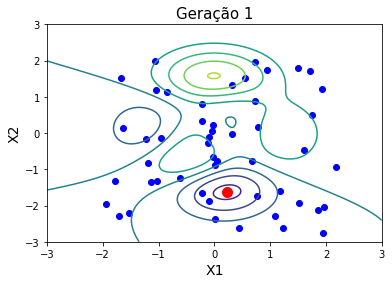

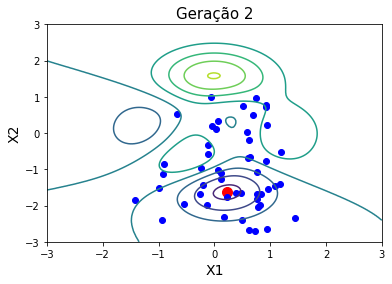

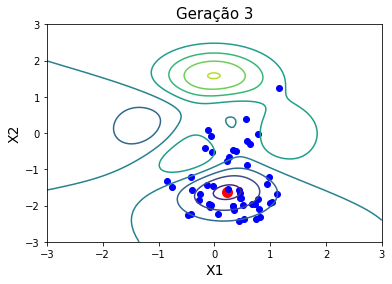

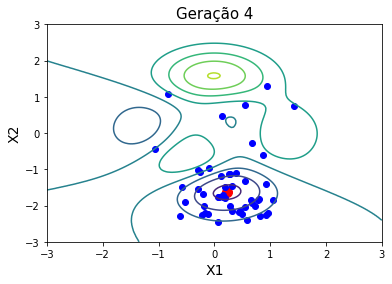

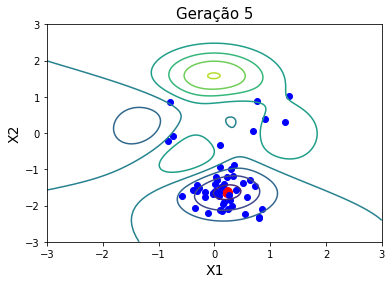

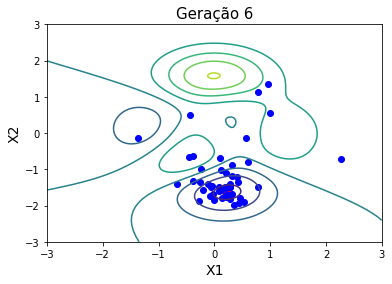

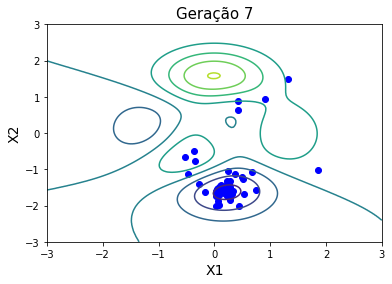

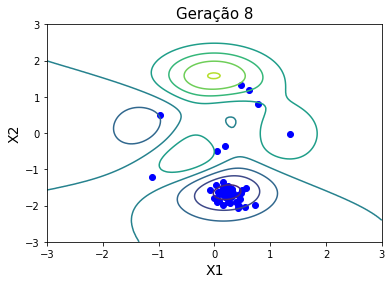

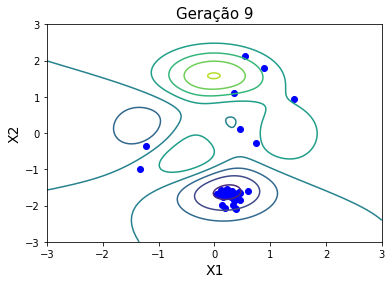

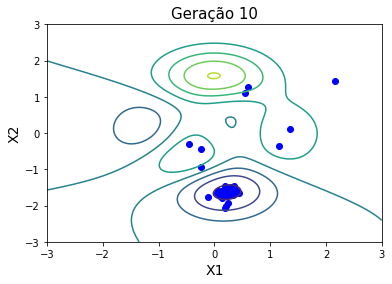

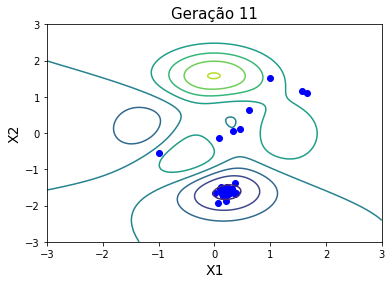

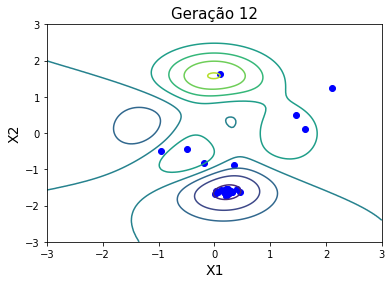

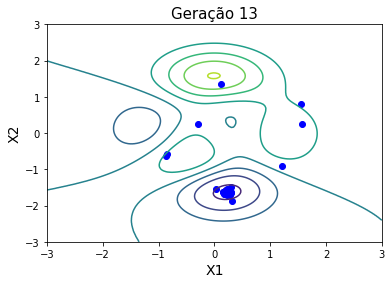

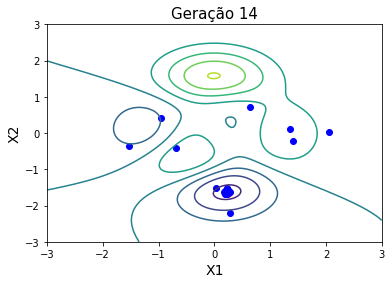

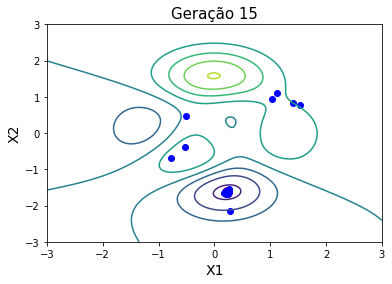

GERAÇAO FINAL:  16
Posição do melhor indivíduo final: [0.235, -1.623]
Minímo da população: -6.5511 

Valor de W ao longo das gerações: [0.7, 0.6733333333333333, 0.6466666666666666, 0.62, 0.5933333333333333, 0.5666666666666667, 0.54, 0.5133333333333333, 0.48666666666666664, 0.45999999999999996, 0.4333333333333333, 0.4066666666666666, 0.38, 0.35333333333333333, 0.32666666666666666]


In [16]:
#BLOCO 12: BLOCO PRINCIPAL

## inicialização da população
Ws = []                                                                                                 #lista para armazenar os W ao longo das gerações
pop = []                                                                                                #lista para armazenar a população 
velocidades = []                                                                                        #lista para armazenar as velocidades
pbest = []                                                                                              #lista para armazenar a melhor posição de cada particula
minimos = []                                                                                            #lista para armazenar o melhor f(x) de cada particula
pg = []                                                                                                 #lista para armazenar a melhor posição já encontrada

initPop(pop, velocidades)                                                                               #cria a população e as velocidades iniciais
pop_fitness = popfitness(pop)                                                                           #analisa o fitness da população
best = min(pop_fitness)                                                                                 #descobre o melhor f(x) da população inicial
pos_best = pop_fitness.index(best)                                                                      #descobre a posição do melhor individuo

pbest = pop[:]                                                                                          #preenche 'pbest' na geração inicial
minimos = pop_fitness[:]                                                                                #preenche 'minimos' na geração inicial

pg = (pop[pos_best])                                                                                    #preenche o pg na geração inicial
t = 1                                                                                                   #contador de gerações                          

print(f'Melhor indivíduo inicial: {pg}; Minímo da população: {best}')

while best != minimum_global:                                                                           #laço até encontrar a solução perfeita
                                                                                                 
    for c in range(0,N):                                                                                #laço que percorre todos os indivíduos
        if(calcula_f_de_x(pop[c]) < minimos[c]):                                                            #compara o f(x) de cada individuo da população atual com os da lista minimos
            minimos[c] = calcula_f_de_x(pop[c])                                                                 #caso, o individuo da população atual seja melhor, atualiza minimos
            pbest[c] = pop[c]                                                                                   #também salva a posição dele em pbest
        best = min(minimos)                                                                                 #descobre o melhor f(x) da geração
        pos_best = minimos.index(best)                                                                      #descobre a posição do melhor individuo
        pg = pbest[pos_best]                                                                                #atualiza pg
        
        individuo = []
        individuo.append(pop[c][0])              
        individuo.append(pop[c][1])                                                                         #lista auxiliar para armazenar um individuo da população
        for d in range(0,2):                                                                                #laço para ambas dimensoes do problema
            P1 = rd.random()
            P2 = rd.random()
            t1 = P1*C1
            t2 = P2*C2
            vel = W*velocidades[c][d] + t1*(pbest[c][d] - individuo[d]) + t2*(pg[d] - individuo[d])                 #calcula uma coordenada do vetor velocidade do individuo
            if(vel>vmax):                                                                                           #confere se a velocidade eh maior do que a permitida no problema
                vel = vmax                                                                                                  #altera a velocidade para o valor máximo, caso positivo
            elif(vel<-vmax):                                                                                        #confere se a velocidade eh menor do que a permitida no problema
                vel = -vmax                                                                                                 #altera a velocidade para o valor minimo, caso positivo
            velocidades[c][d] = vel                                                                                 #atualiza uma coordenada do vetor velocidade do individuo
        
        movimentacao(individuo, velocidades[c])                                                                     #movimenta o individuo
        pop[c] = individuo[:]                                                                                       #atualiza a população

    Ws.append(W)                                                                                                    #armazena o valor de W
    W = atualizaW(t)                                                                                                #muda o valor de W para a próxima geração
    grafico(pop, t)
    t = t + 1                                                                                               #incrementa a geração 
    
                                                                                                                                          
#formatando os valores finais                                          
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))

print('GERAÇAO FINAL: ', t) 
print(f'Posição do melhor indivíduo final: [{pop[pos_best][0]}, {pop[pos_best][1]}]')
print(f'Minímo da população: {best} \n')
print(f'Valor de W ao longo das gerações: {Ws}')


# **RELATÓRIO EVOLUÇÃO DIFERENCIAL - FUNÇÃO PEAKS**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# *_IMPLEMENTAÇÃO_*: 

### <ins>Criando a População:</ins>
Inicialmente, foi preciso que o algoritmo criasse uma população. Isso foi feito apartir da função `def initPop(pop, velocidades):`. Um individuo é representado pela lista `individuo`, esta contendo 2 valores: o primeiro para a coordenada x1 e o segundo para a coordenada x2. Logo, foram gerados 2 números aleatórios entre -3 e 3 para cada indivíduo. No total, 50 indivíduos foram criados e armazenados na lista `pop` passada como parâmetro.
Essa mesma função também gera as velocidades iniciais de cada indivíduo e as salva na lista `velocidades`, também passada como parâmetro. Uma velocidade é representada por uma lista também contendo 2 valores: o primeiro representa a velocidade no eixo x1 e o segundo para o eixo x2. Logo, foram gerados 2 números aleatórios de -1 a 1 para cada velocidade. 
Para mais detalhes olhar o <span style="color:green">*[BLOCO 2]*</span>.

### <ins>Função de Aptidão:</ins>
A função de aptidão define a qualidade de uma solução candidata. Optamos por utilizar o f(x) do individuo como o seu fitness. Ou seja, quanto menor o resultado da função peaks de um indivíduo, mais bem avaliado ele é. Nesse caso, quanto mais próximo de -6,5511, melhor. 
O processo foi feito em todos os indivíduos da população e o resultado foi armazenado em uma lista chama `pop_fitness`. Para mais detalhes olhar os <span style="color:green">*[BLOCOS 4 e 6]*</span>.

### <ins>Função de Movimentação:</ins>
Essa função é responsável por movimentar um indíviduo. Os parâmetros recebidos por essa função são um `individuo` e uma `velocidade`. Esses parâmetros são somados atualizando assim os valores do `individuo`. Caso alguma dessas coordenadas ultrapasse o limite territorial do gráfico, ela é refletida. Feito isso, a função retorna o individuo atualizado. Para mais detalhes olhar o <span style="color:green">*[BLOCO 8 e 9]*</span>.

### <ins>Influência das Oscilações:</ins>

Como foi mencionado nos slides base para a prática, o peso de inércia W pode ser alterado ao final de cada iteração. Optamos por utilizar tal método, pois ele é responsável por controlar intensidade das oscilações dos indivíduos. Esse mecanismo produz oscilações mais intensas no começo do código, o que facilita a encontrar novas depress~]oes na superfície, e produz oscilações mais suaves no final do código, o que faz com que os indivíduos se aproximem de forma mais precisa para nosso ponto desejado. Para mais detalhes olhar o <span style="color:green">*[BLOCO 10]*</span>.

### <ins>Função Gráfica:</ins>

Ao final de cada iteração, um gráfico é plotado mostrando uma situação geral de tal geração. As linhas contínuas são as curvas de nível de nossa superfície. As linhas com tons esverdeados representam elevações em nossa superfície, enquanto as linhas com tons acizentados representam as suas depressões. Os pontos azuis representam a posição final dos indivíduos no final da geração, enquanto o ponto vermelho representa o minímo global, ou seja, onde eles precisam chegar. O gráfico foi feito a partir de funções da biblioteca `matplotlib`.  Para mais detalhes olhar o <span style="color:green">*[BLOCO 11]*</span>.

### <ins>Testes:</ins>

Todas as funções importantes para o funcionamento do programa tem seus testes implementados no bloco subsequente. Olhar os <span style="color:green">*[BLOCOS 3, 5, 7, 9]*</span>.

### <ins>Condição de Parada:</ins>

O algoritmo só termina quando encontra a solução perfeita. A solução perfeita é o minímo global que foi dado no enunciado (-6.5511). Quando o melhor indivíduo da população tiver o f(x) igual a esse valor, o algoritmo termina. Como dito anteriormente, o f(x) é calculado através da função peaks. A cada geração, o algoritmo confere o f(x) do melhor indivíduo. Para mais detalhes olhar o <span style="color:green">*[BLOCOS 12]*</span>.

### <ins>Código Principal:</ins>

Olhar <span style="color:green">*[BLOCO 12]*</span>.

Inicialmente, criamos todas as listas e variáveis necessárias para o funcionamento do algoritmo. O comando `while` então é usado para controlar o avanço das gerações e a condição de parada do algoritmo.  O primeiro `for` que este bloco contém é rodado 50 vezes, uma para cada indivíduo na população. Nele é checado através de um `if`, se o f(x) do indivíduo é melhor que o melhor f(x) que ele já esteve. Caso seja, ele atualiza a  lista `minimos[c]` com esse valor, e a lista `pbest[c]` com tal posição. Ambas as listas possuem 50 elementos, um para cada individuo. Elas são responsáveis pela memória individual dos indivíduos. Em sequência, o algoritmo salva na variável `best` o menor valor da lista `minimos[c]`, e sua posição na lista `pg`. Estas variaveis são responsáveis pela memória coletiva da população. 
Em seguida, nesse mesmo `for` uma lista auxilar chamada `individuo` é criada para armazenar um individuo. Um segundo `for` é utilizado 2 vezes, com o propósito de gerar cada elemento do vetor velocidade da partícula, e então atualizar a lista `velocidades`. Caso essa velocidade ultrapasse a velocidade máxima estipulada pelo problema, ela toma o valor máximo. O mesmo acontece com o valor minímo. Feito isso, o código chama a função de movimentação e atualiza a população. 
Ao final de cada iteração do `while`, o W é atualizado apartir de uma função ,a geração é incrementada e um gráfico é gerado trazendo a disposição dos indivíduos em nosso cenário. 



# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Eficiência:</ins>

Para testarmos o funcionamento e a eficiência da função Peaks, decidimos simular o código 100 vezes para calcular o número médio de gerações que o algoritmo encontrava a solução desejada. No final, a média encontrada foi de 33,51 gerações.

<img src=peaks.jpeg alt="Peaks" width="800"/>

Reparamos também que independente da melhor solução inicial gerada, próxima do minímo global ou não, não houve uma grande variação no número de gerações para obtermos a solução desejada. Acreditamos que isso acontece porque no início do processo de otimazação temos muitos vetores-diferenças disponíveis, logo o algoritmo explora a maioria deles até descobrir os melhores, o que custa algumas gerações. Com o passar das gerações, os possíveis vetores-diferenças acabam ficando mais próximos e uniformes até convergirem para o resultado desejado. 


